In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import SeparableConv2D, GlobalAveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

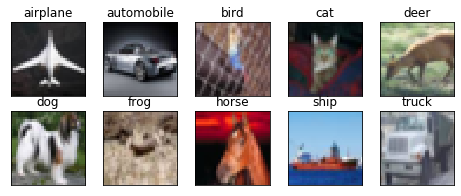

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 9s 24ms/step - loss: 1.8505 - acc: 0.2906 - val_loss: 1.4253 - val_acc: 0.4718
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3408 - acc: 0.5143 - val_loss: 1.1434 - val_acc: 0.5795
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1316 - acc: 0.5995 - val_loss: 0.9599 - val_acc: 0.6587
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9867 - acc: 0.6554 - val_loss: 0.8335 - val_acc: 0.7078
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8854 - acc: 0.6934 - val_loss: 0.8206 - val_acc: 0.7142
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8228 - acc: 0.7157 - val_loss: 0.7293 - val_acc: 0.7503
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7594 - acc: 0.7385 - val_loss: 0.7215 - val_acc: 0.7528
Epoch 8/50
390/390 [==============================] - 7s 17ms

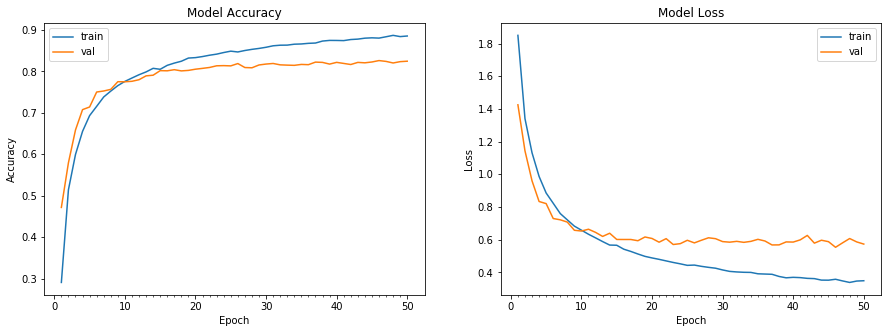

Accuracy on test data is: 82.47


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [10]:
# Define the model
model2 = Sequential()


model2.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same')) #O/P channel size - 32x32x64, RF=3
model2.add(BatchNormalization())

model2.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))#O/P channel size - 30x30x64, RF=5
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))#O/P channel size - 30x30x128, RF=7
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(MaxPooling2D(pool_size=(2, 2))) #O/P channel size - 15x15x128, RF=8

model2.add(Convolution2D(64, 1, 1 , activation='relu')) #O/P channel size - 15x15x64, RF=8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(96, kernel_size=(3, 3), activation='relu',padding='same')) # O/P channel size - 15x15x96, RF=12
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) #O/P channel size - 13x13x128, RF=16
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(MaxPooling2D(pool_size=(2, 2))) #O/P channel size - 6x6x128,RF=18

model2.add(SeparableConv2D(128, kernel_size=(3, 3), activation='relu')) #O/P channel size - 4x4x128, RF=26
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(10, kernel_size=(3, 3), activation='relu')) #O/P channel size - 2x2x10, RF=34
model2.add(BatchNormalization())

model2.add(GlobalAveragePooling2D()) #O/P channel size - 1x1x10
model2.add(Activation('softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`


In [11]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 64)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 30, 30, 128)       8896      
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 21s 55ms/step - loss: 1.4568 - acc: 0.5029 - val_loss: 1.1427 - val_acc: 0.6077
Epoch 2/50
390/390 [==============================] - 19s 50ms/step - loss: 1.0396 - acc: 0.6609 - val_loss: 1.0085 - val_acc: 0.6591
Epoch 3/50
390/390 [==============================] - 19s 50ms/step - loss: 0.8750 - acc: 0.7145 - val_loss: 0.8485 - val_acc: 0.7171
Epoch 4/50
390/390 [==============================] - 19s 50ms/step - loss: 0.7755 - acc: 0.7446 - val_loss: 0.7899 - val_acc: 0.7335
Epoch 5/50
390/390 [==============================] - 19s 50ms/step - loss: 0.7040 - acc: 0.7667 - val_loss: 0.7205 - val_acc: 0.7555
Epoch 6/50
390/390 [==============================] - 19s 50ms/step - loss: 0.6494 - acc: 0.7844 - val_loss: 0.7028 - val_acc: 0.7624
Epoch 7/50
390/390 [==============================] - 19s 50ms/step - loss: 0.6127 - acc: 0.7970 - val_loss: 0.6379 - val_acc: 0.7837
Epoch 8/50
390/390 [==============================] - 19s 50ms

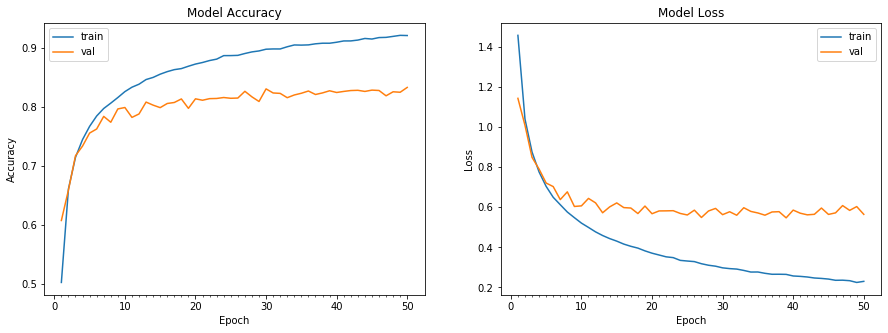

Accuracy on test data is: 83.27


In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))